In [1]:
import Example2_code as ep
import Example3_code as ep3
import RBF as r

# Multi-layer Perceptron Computer Exmaples

In this project we will attempt to solve the computer experiment in section 4.7, with the objective to demonsrate 
* Demonsrate multilayer perceptron
* Find more difficult case for non linearity
    + Size of input layer: $m_0=2$.
    + size of the single hiddn layer: $m_1=20$.
    + Size of the output layer: $m_2=1$. 
    + Activition function as the hyperbolic tangent function (not yet implement)
    $$\varphi(v) = \frac{1-\exp(-2v)}{1+\exp(-2v)}$$
    + Zero thershhold setting
    + learning parameter $\eta$: annealed linearly from $10^{-1}$ to $10^{-5}$.

The experiment is carried in two parts, one corresponding to vertical seperation $d=-4$ and other to $d=-5$.

The below code is a modification of the example provided by:
<br />https://analyticsindiamag.com/perceptron-is-the-only-neural-network-without-any-hidden-layer/
<br />and
<br />https://towardsdatascience.com/perceptron-explanation-implementation-and-a-visual-example-3c8e76b4e2d1
<br />and 
<br />https://sdat.ir/en/sdat-blog/python-kernel-tricks-and-nonlinear-dimensionality-reduction-via-rbf-kernel-pca

We load a dataset to perform the algorithm on in the form:

$$X_i = [x_i\text{-cordinate}, y_i\text{-cordinate},\text{property} ],\quad \vec y = (y_1,y_2,\dots)-\text{target}$$

We use the common Iris dataset, clean it to enable linear fitting

In [2]:
#ep.load_data_set()

Now we performing the algorithm using a binomial activision function, by setting the initial conditions to be chosen at random, and we plot the avrage error-energy function at each layer $\xi_{\rm{avg}_j}(n)$ to obtain the learning curve.

Now let us see the plot for the data (Still work in process so its wrong ... for now)

In [1]:
# First example
#per = ep.Perceptron(learning_rate=0.1, n_epoch=100, random_state=1)
#per.compute()
#ep.load_data_set(show = False, line = True, weights = per.weights[1:] )

# Another example

Now we shall consider another example with a different code

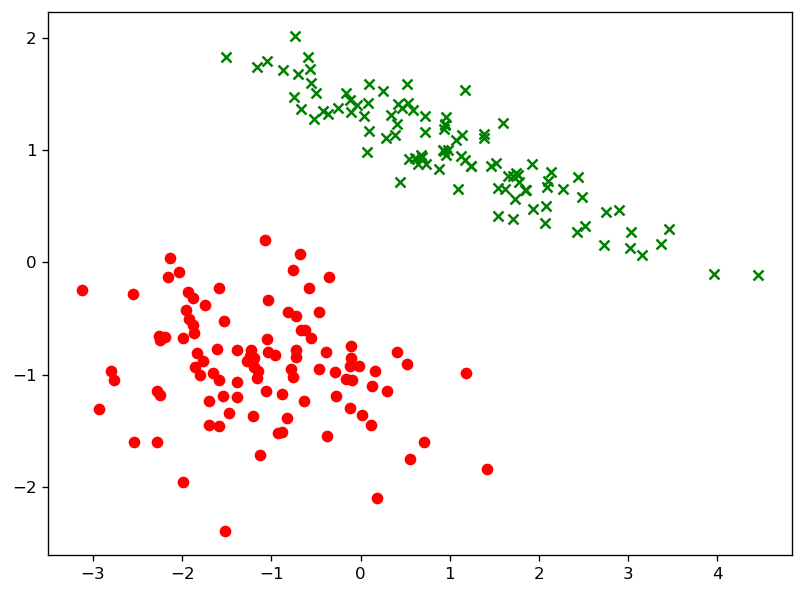

In [2]:
ep3.show_data()

Now that we loaded the data we should train it by spliting the data into two sets 'train' and 'test' at random using buildin methods of the sklearn library. The method shuffles the data first, then splits it. 

```python
def train_data(X,y, location = 'output/lin_sep/anim'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
    
    # In the animation method we save a 'screenshoot' of each iteration fo the final animation
    perceptron_anim(X, y, X_train, y_train, X_test, y_test, location,
        iteration_level=False, p=1, n_iter=2)

    perceptron = Perceptron()
    perceptron.fit(X_train, y_train)
    score = perceptron.score(X_test, y_test)
    return score
```

Then in the `fit()` method we perfom the perceptron algorithm using formula for the updated weight as follows for data input $X$ and target data $D$ and activitaion function $\varphi(\nu)$:
$$
\begin{align*}
&\text{For i in range of (0, 'num of iterations')}\\
&\quad \text{For each pair (x, d) in X, D:}\\
&\quad \quad \nu = d(x \cdot w)\\
&\quad \quad \text{If } \varphi(\nu) \leq 0:\\
&\quad \quad \quad w = w + yx\quad\text{-we update the weight}
&\end{align*}
$$

which is implements (to some degree) as such:
```python
    def fit(self, X, y, n_iter=100):
        """
        Used to train the perceptron.
        X - 2D array of data
        y - 1D array with the label for each row of data
        """
        
        n_samples = X.shape[0] 
        n_features = X.shape[1]
        self.weights = np.zeros((n_features+1,))
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)

        for i in range(n_iter):
            for j in range(n_samples):
                if y[j]*np.dot(self.weights, X[j, :]) <= 0:
                    self.weights += y[j]*X[j, :]
```

with binomial activition function (to be modified later as well).

<Figure size 432x288 with 0 Axes>

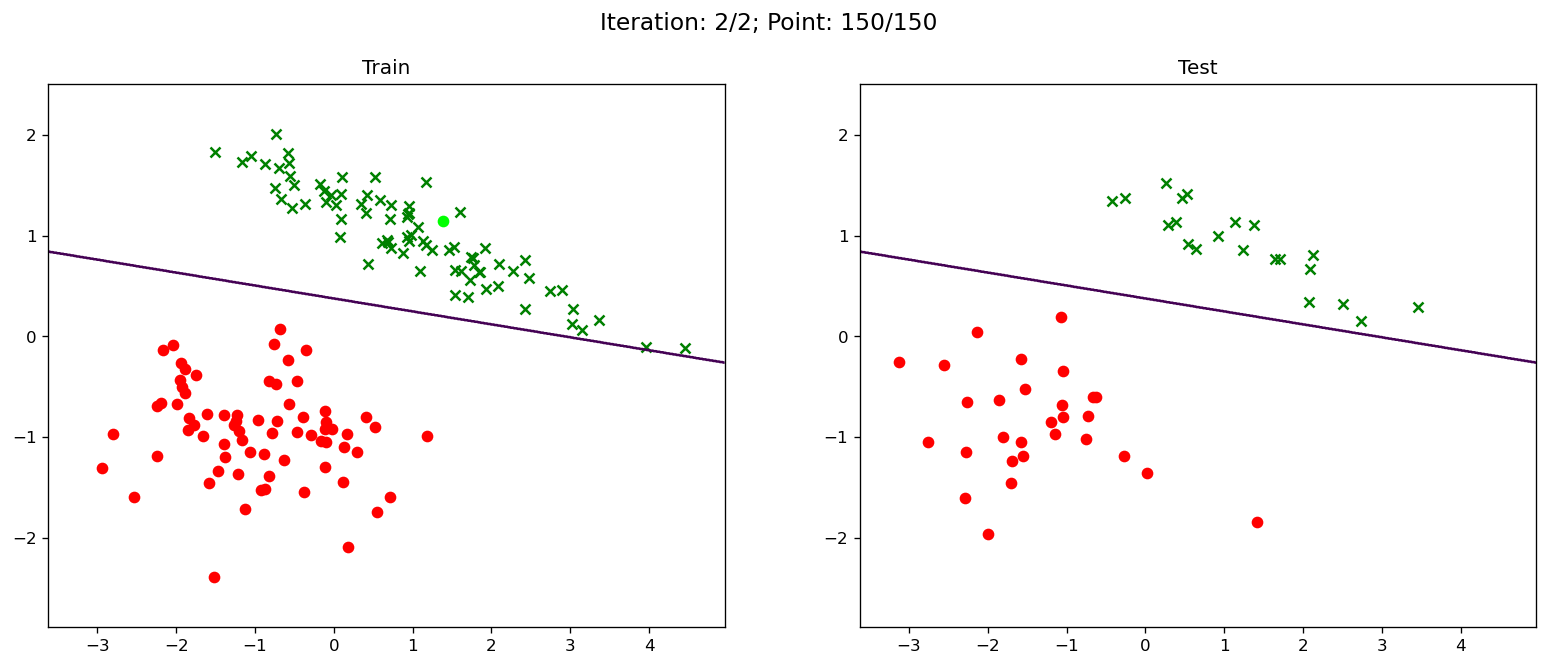

In [3]:
X,y = ep3.show_data(show = False)
score = ep3.train_data(X,y)

Now we can plot the result of each iteration as a line on our data set and animate the process, where at each iteration/epoch the grean bubble is the 'tested' object that is compared to the train set

<img src="animation_new.gif" width="1000" align="center">

with a score of:

In [6]:
print(score)

1.0


We can also prefom the same on our old data set by 

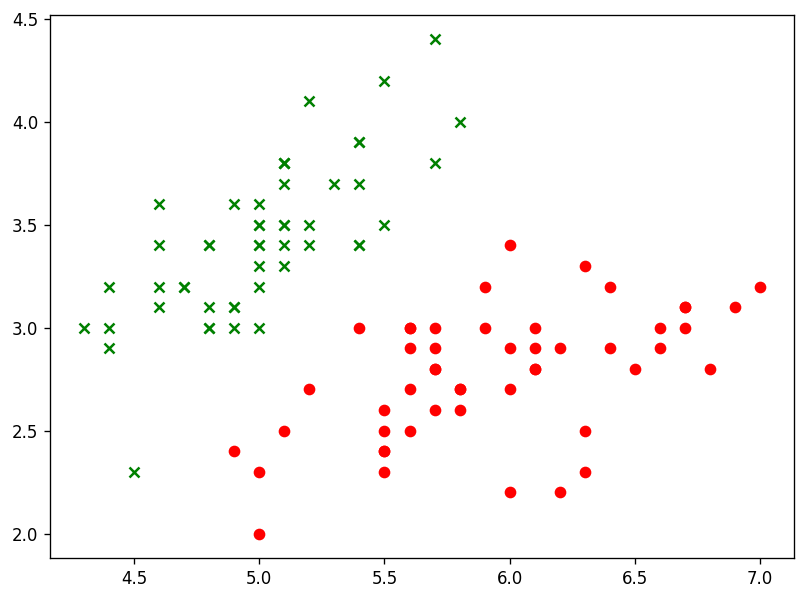

In [7]:
%%time
x1, y1 = ep3.load_data_set(show = False, xy = True)
ep3.show_data(X_data = x1, y_data = y1, n_samples = 100)

C:\Users\Natanael\Documents\Research\Machine-Learning\Example3_code.py:193: UserWarning: No contour levels were found within the data range.
  ax.contour(x, y, z, levels=[0])


<Figure size 432x288 with 0 Axes>

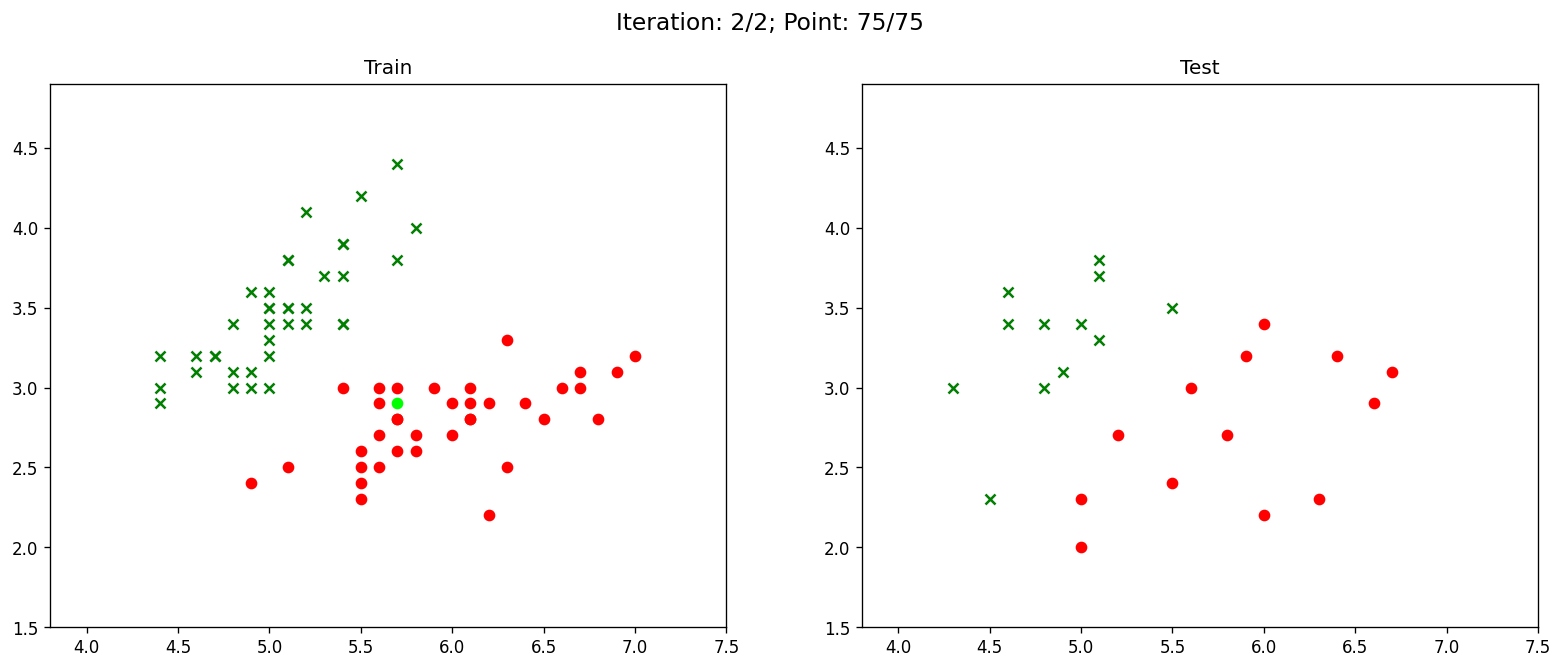

In [8]:
score = ep3.train_data(x1,y1, 'output/lin_sep/anim1')

Note: for yet unknown  reason the line is not showing up, however we did recive an accuracy score below

<img src="animation2.gif" width="1000" align="center">

In [9]:
print(score)

0.52


Now one think what would happen if we consider a non seperable example, in theory we should not be able to perfome a fit, however we can still attempt this case as follows

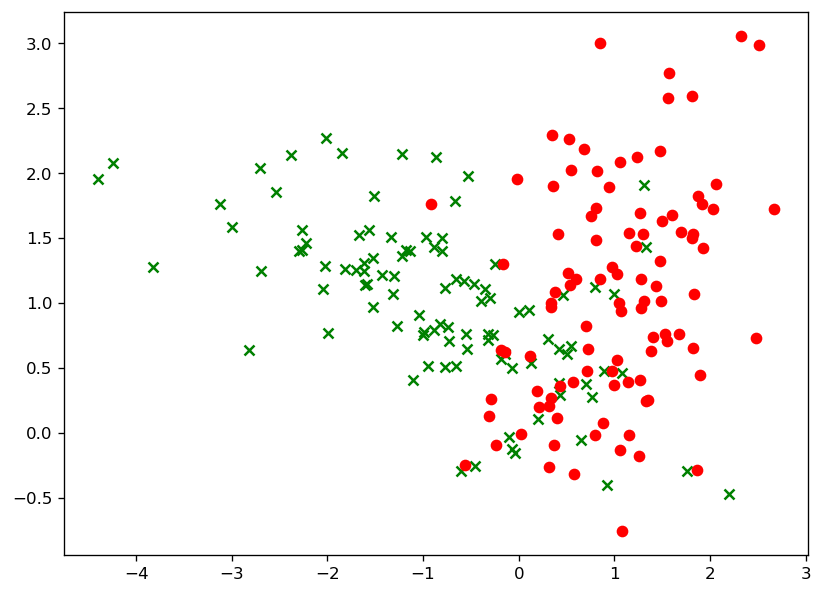

<Figure size 432x288 with 0 Axes>

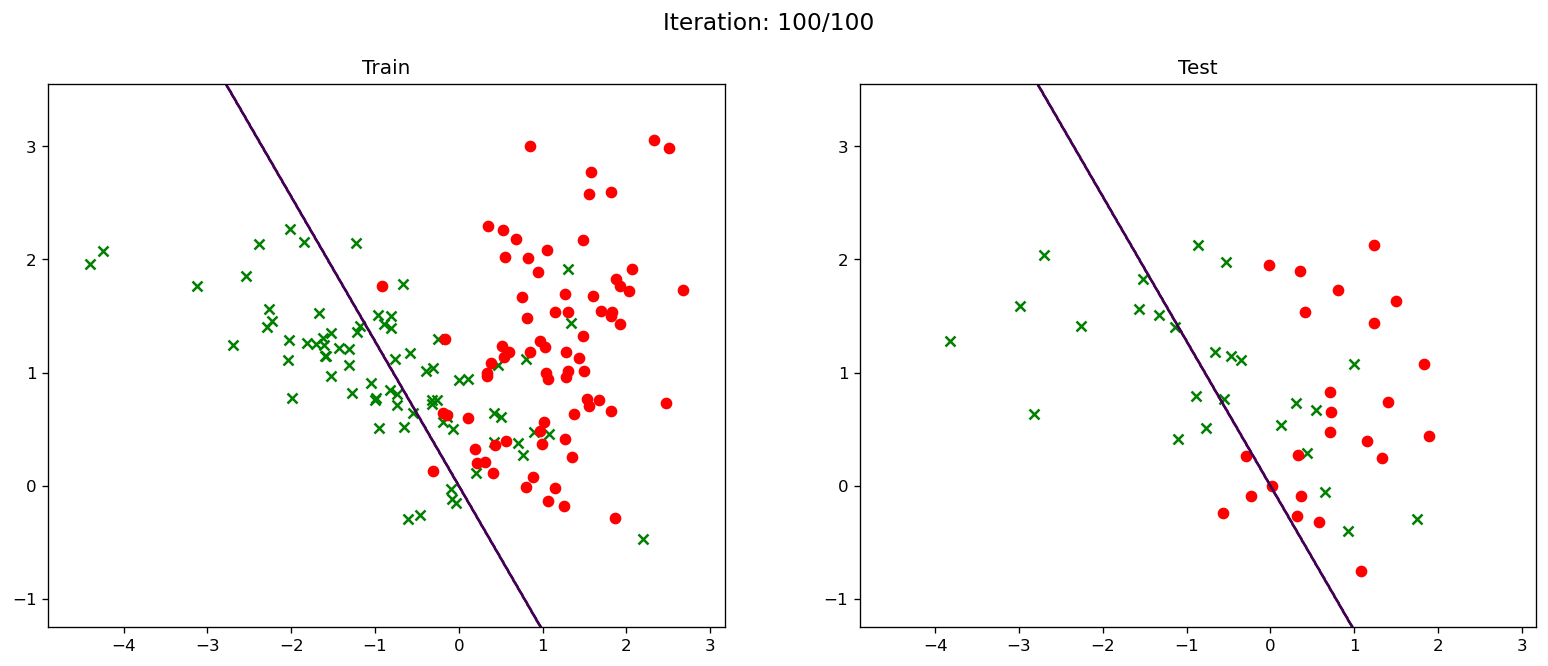

Wall time: 1min 6s


In [3]:
%%time
X_b,y_b = ep3.show_data(X = './data/X_lin_noise.npy', y = './data/y_lin_noise.npy', show = False)
score = ep3.train_bad_data(X_b,y_b)

As we see its a pretty bad split, but it does seem to seperate the data as best as it can.

# Non-linearity 

Now let us consider an example where the data is seperable but not linear. In this case we would not want to use the Perceptron any more, but rather want to use _radial-basis function_ (RBF) classification, where we transform the problem to higher dimension in order to find a way to linearly seperate the data.

But first let us consider a simpler case where we can still use the Perceptron using polynomial that help uys find the boundry (...)

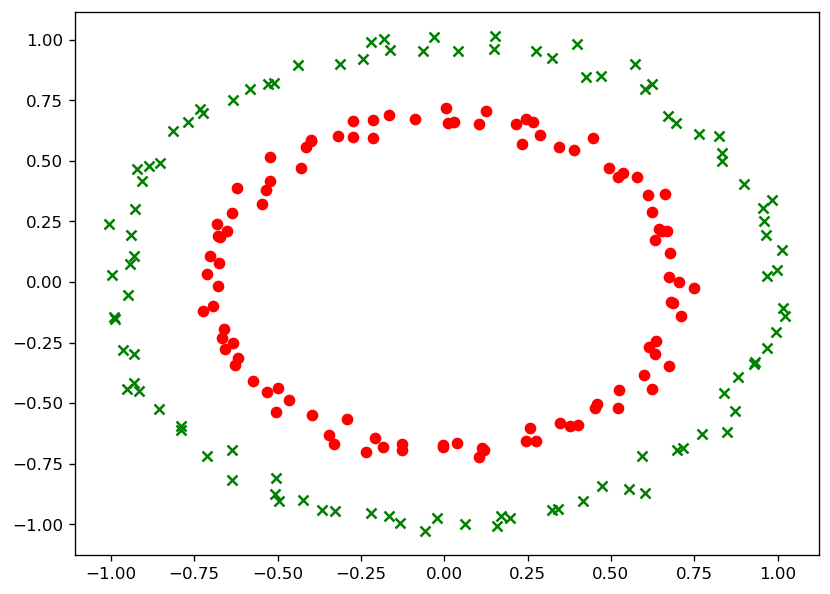

In [5]:
ep3.show_data(X = './data/X_circles.npy', y = './data/y_circles.npy')

### Or the half moon example

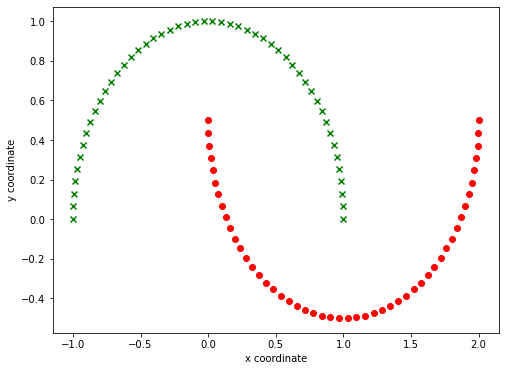

In [2]:
r.draw_half_moon()